# Logistic Regression

For this problem, you will be implementing a Logistic Regression model for binary classification (yes-or-no like predictions). This is a simple model with restricted application areas, but it is very useful when applied to appropriate problems. Moreover, for those of you interested in Deep Learning, many of the concepts covered here are fundamental to how most neural networks as built and optimized.

You should begin by implementing a standard form of logistic regression. That is, we want to predict a target variable $y \in \{0, 1\}$ given observed feature variables $x \in \mathbb{R}^n$, and their relationship is modeled as:

- prediction $ = \hat{y} = h_\theta(x) = \sigma(\theta^T x) \in (0, 1)$, where:
    - $h_\theta$ is your Logistic Regression model
    - $\theta \in \mathbb{R}^n$ is the parameters of the model
    - $\sigma(z) = \frac{1}{1 + e^{-z}}$ is the logistic function (`sigmoid` in the provided code)

The parameters $\theta$ should be optimized with gradient descent on a loss derived from maximum likelihood estimation under the assumption that $P(y | x, \theta)$ is Bernoulli distributed.
Please refer to [Andrew Ng's lecture notes on supervised learning](http://cs229.stanford.edu/notes2020spring/cs229-notes1.pdf) for more details. The most salient information for this problem can be found in Section 5, but we recommend that you read through all of it.

We have provided some skeleton code for the classifier, along with a couple of utility functions in the [logistic_regression.py](./logistic_regression.py) module. Please fill out the functions marked with `TODO` and feel free to add extra constructor arguments as you see fit (just make sure the default constructor solves the first dataset).

In [435]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We begin by loading necessary packages. Below follows a short description of the imported modules:

- `numpy` is the defacto python package for numerical calculation. Most other numerical libraries (including pandas) is based on numpy.
- `pandas` is a widely used package for manipulating (mostly) tabular data
- `matplotlib` is the most used plotting library for python
- `seaborn` contains several convience functions for matplotlib and integrates very well with pandas
- `logistic_regression` refers to the module in this folder that should be further implemented by you.

Note: The `%autoreload` statement is an [IPython magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html) that automatically reloads the newest version of all imported modules within the cell. This means that you can edit the `logistic_regression.py` file and just rerun this cell to get the updated version.

In [436]:
%autoreload 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import logistic_regression as lr   # <-- Your implementation

sns.set_style('darkgrid') # Seaborn plotting style 

## [1] First Dataset

The first dataset is a simple problem that can be used to debug your algorithm. The objective is to predict whether the dependent variable ($y$) should be equal to 1 or 0 based on two independent variables ($x_0$ and $x_1$).

### [1.1] Load Data

We begin by loading data from the .csv file located in the same folder as this notebook.

In [437]:
data_1 = pd.read_csv('data_1.csv')
data_1.head()

,x0,x1,y
0,0.167745,0.025549,0.0
1,0.916503,0.744718,1.0
2,0.056172,0.586527,0.0
3,0.453699,0.495267,1.0
4,0.621778,0.437974,1.0


### [1.2] Visualize

Since the feature-space is continuous and 2-dimensional, it lends itself nicely to visualization with a scatter plot.

<Axes: xlabel='x0', ylabel='x1'>

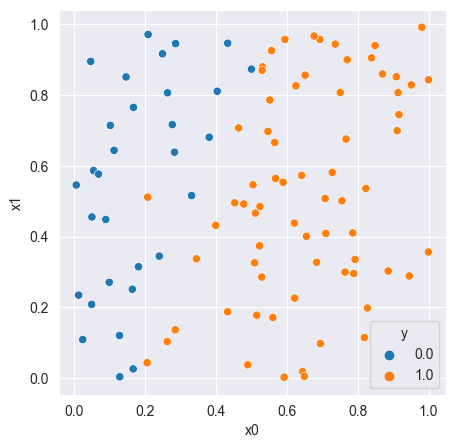

In [438]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='x0', y='x1', hue='y', data=data_1)

### [1.3] Train and Evaluate

Next we fit and evaluate a Logistic Regression classifier over the dataset. We first partition the data into the dependent (`y`) and independent (`X`) variables. We then initialize a Logistic Regression classifier and fit it to all the data. Finally, we evaluate the model over the same data by calculating _accuracy_ and (binary) _cross entropy_.

- The accuracy is given by the fraction of correctly classified samples. Since the Logistic Regression classifier outputs "soft" predictions ($\hat{y} \in (0, 1)$), we threshold the predictions so that $\hat{y} \geq 0.5$ is considered a $1$ and $\hat{y} < 0.5$ is considered a $0$.

- The [cross entropy](https://en.wikipedia.org/wiki/Cross_entropy) measures the dissimilarity between the distributions of the true labels ($y$) and the "label-probablities" ($\hat{y}$) predicted by your model. It is subject to minimization and (hint) _highly_ related to your maximal likelihood objective.

Note that `.fit` and `.predict` will crash until you implement these two methods in [logistic_regression.py](./logistic_regression.py).

Assuming a standard implementation of logistic regression with batch gradient descent, you should expect to get an accuracy of at least 90%.

With weights initialized manually we get those results:

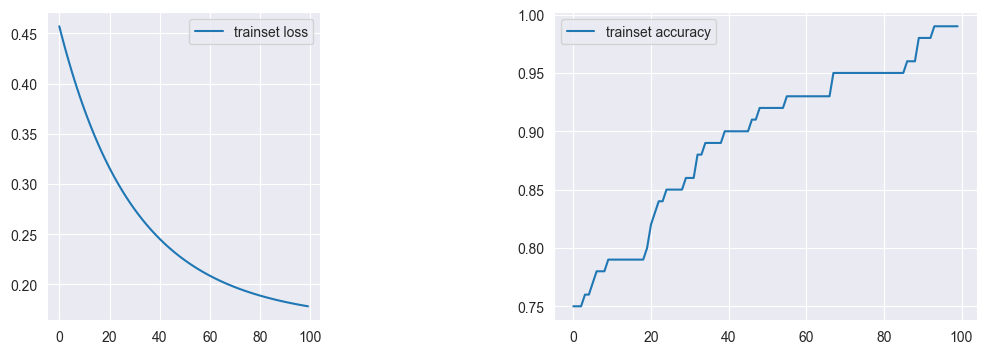

Accuracy: 0.990
Cross Entropy: 0.178


In [439]:
# Partition data into independent (feature) and depended (target) variables
X = data_1[['x0', 'x1']]
y = data_1['y']

# Make the data usable
X, y = np.array(X), np.array(y)
y = y.reshape(y.shape[0], 1)

# Create and train model.
model_1 = lr.LogisticRegression() 
model_1.fit(X, y, init_mode='manual')

# Calculate accuracy and cross entropy for (insample) predictions 
y_pred = model_1.predict(X)
print(f'Accuracy: {lr.binary_accuracy(y_true=y, y_pred=y_pred, threshold=0.5) :.3f}')
print(f'Cross Entropy: {lr.binary_cross_entropy(y_true=y, y_pred=y_pred) :.3f}')

(2, 1)


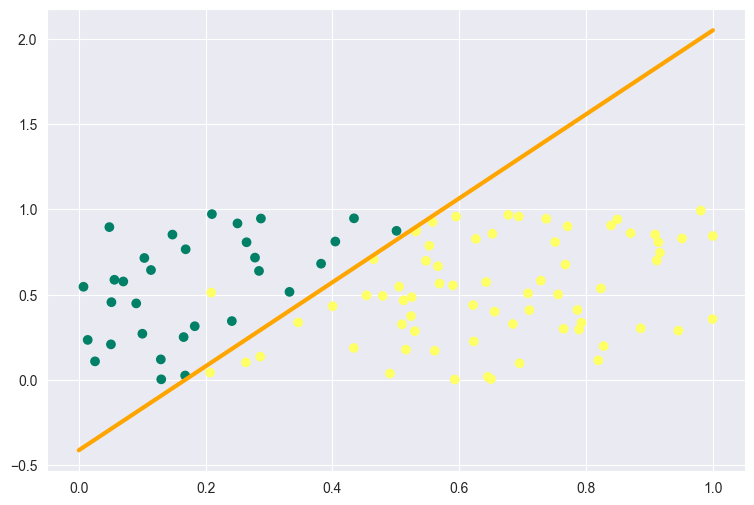

In [440]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='summer')

b = model_1.b
W = model_1.weights
print(W.shape)
x1 = np.linspace(0, 1, 100)
x2 = - ( W[0] * x1 + b) / W[1]

ax.plot(x1, x2, c='orange', lw=3)

With weights initialized randomly we get those results:

X shape : (100, 2)


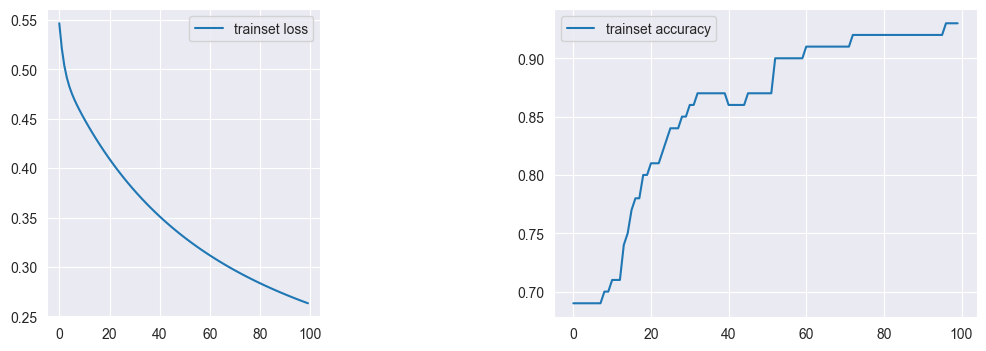

Accuracy: 0.930
Cross Entropy: 0.262


In [441]:
# Partition data into independent (feature) and depended (target) variables
X = data_1[['x0', 'x1']]
y = data_1['y']

# Make the data usable
X, y = np.array(X), np.array(y)
y = y.reshape(y.shape[0], 1)

# Create and train model.
model_1 = lr.LogisticRegression() 
model_1.fit(X, y, lr=1, nb_epochs=100, init_mode='auto')

# Calculate accuracy and cross entropy for (insample) predictions 
y_pred = model_1.predict(X)
# print(y_pred, y)
print(f'Accuracy: {lr.binary_accuracy(y_true=y, y_pred=y_pred, threshold=0.5) :.3f}')
print(f'Cross Entropy: {lr.binary_cross_entropy(y_true=y, y_pred=y_pred) :.3f}')

(2, 1)


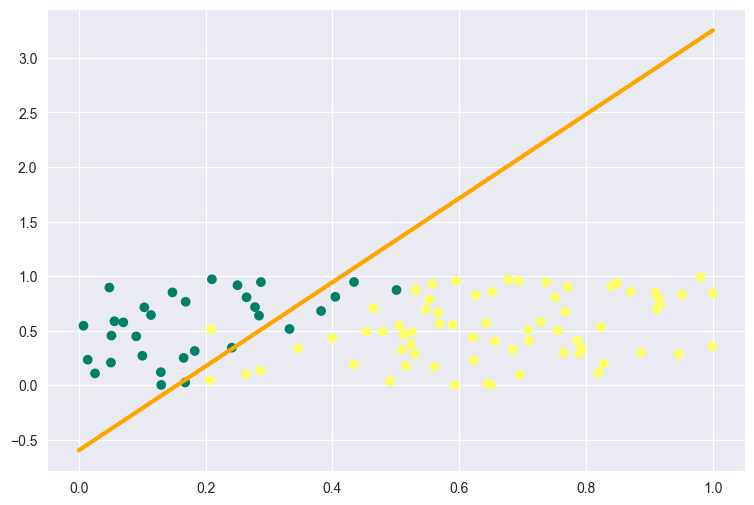

In [442]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='summer')

b = model_1.b
W = model_1.weights
print(W.shape)
x1 = np.linspace(0, 1, 100)
x2 = - ( W[0] * x1 + b) / W[1]

ax.plot(x1, x2, c='orange', lw=3)

### [1.4] Visualize Decision Boundary

Logistic Regression does not make hard classification decisions. Instead, it attempts to model the probability of a datapoint belonging to the 1-class after conditioning on the available features ($x_0, x_1$ here). The modeled probability of the 0-class can be obtained by negating and adding one.

We can visualize the modeled probabilities across the entire input space. In the cell below, we rasterize the model's prediction over a grid that covers approximately the same area as the data used to train it. Red regions correspond to high modeled probability for the 1-class whereas blue correspond to high modeled probability for the 0-class. Does the decisions of your model line up well with the provided data? What happens if you train it for longer?

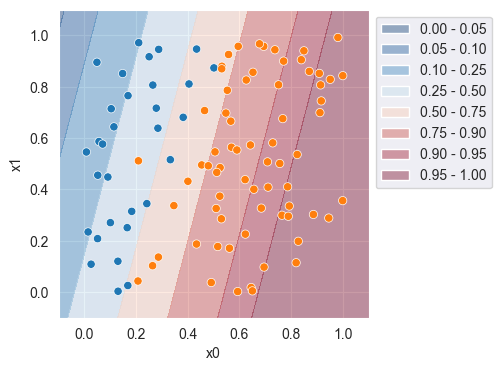

In [443]:
# Rasterize the model's predictions over a grid
xx0, xx1 = np.meshgrid(np.linspace(-0.1, 1.1, 100), np.linspace(-0.1, 1.1, 100))
yy = model_1.predict(np.stack([xx0, xx1], axis=-1).reshape(-1, 2)).reshape(xx0.shape)

# Plot prediction countours along with datapoints
_, ax = plt.subplots(figsize=(4, 4), dpi=100)
levels = [0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1.0]
contours = ax.contourf(xx0, xx1, yy, levels=levels, alpha=0.4, cmap='RdBu_r', vmin=0, vmax=1)
legends = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in contours.collections]
labels = [f'{a :.2f} - {b :.2f}' for a,b in zip(levels, levels[1:])]
sns.scatterplot(x='x0', y='x1', hue='y', ax=ax, data=data_1)
ax.legend(legends, labels, bbox_to_anchor=(1,1))

## [2] Second Dataset

The second dataset is superficially similar to the first one. The objective is still to predict whether the dependent variable ($y$) should be equal to 1 or 0 based on two independent variables ($x_0$ and $x_1$). However, it is designed to be a bit more challenging. You might want to explore it beyond what is provided in the cells below.

### [2.1] Load Data

This dataset can also be found in a .csv file in the same folder as this notebook.

In [444]:
# Load second dataset and partition into train/test split
data_2 = pd.read_csv('data_2.csv')
data_2.head()

,x0,x1,y,split
0,0.872494,0.739252,1.0,train
1,0.650888,0.378137,0.0,train
2,0.228505,0.493694,0.0,train
3,0.037880,0.756215,1.0,train
4,0.542346,0.159417,1.0,train


### [2.2] Split Data

The dataset is partitioned into two groups:

- `train` contains 500 samples that you should use to fit the model
- `test` contains another 500 samples that should only be used to check that your solution generalizes well to novel data

In [445]:
data_2_train = data_2.query('split == "train"')
data_2_test = data_2.query('split == "test"')

# Partition data into independent (features) and depended (targets) variables
X_train, y_train = data_2_train[['x0', 'x1']], data_2_train['y']
X_test, y_test = data_2_test[['x0', 'x1']], data_2_test['y']

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

y_train, y_test = y_train.reshape(y_train.shape[0], 1), y_test.reshape(y_test.shape[0], 1)

<Axes: xlabel='x0', ylabel='x1'>

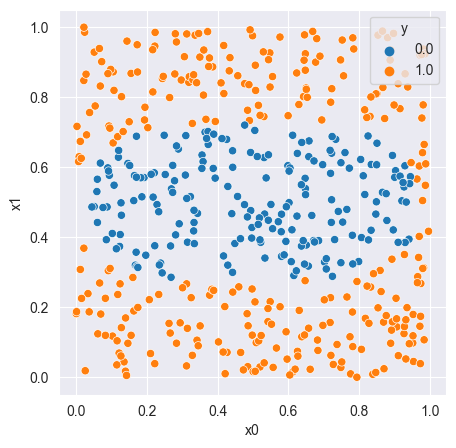

In [446]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='x0', y='x1', hue='y', data=data_2_train)

<Axes: xlabel='x0', ylabel='x1'>

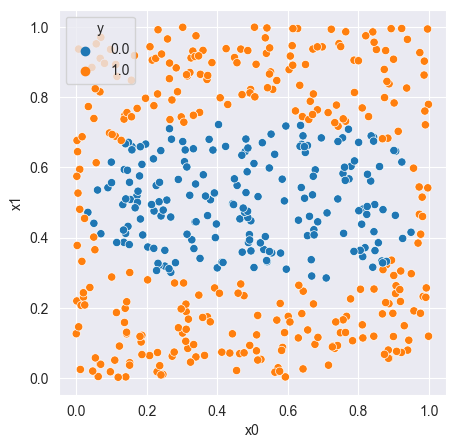

In [447]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='x0', y='x1', hue='y', data=data_2_test)

### [2.3] Fit and Evaluate Model

You may notice that the algorithm that worked pretty well on the first dataset comes up a bit short here. Feel free to add extra functionality to it and/or the data preprocessing pipeline that might improve performance. As a debugging reference; it is possible to obtain accuracies over 80%, both on train and the test set.

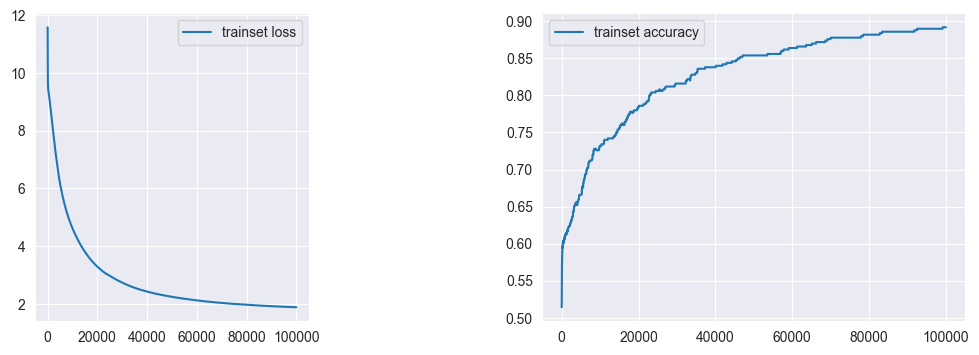

Train
Accuracy: 0.892
Cross Entropy:  1.878

Test
Accuracy: 0.854
Cross Entropy:  2.067


In [466]:
# Fit model (TO TRAIN SET ONLY)
learning_rate = 0.8
epochs = 100000
model_2 = lr.LogisticRegression(dim=12)
model_2.fit(X_train, y_train, lr=learning_rate, nb_epochs=epochs)

# Calculate accuracy and cross entropy for insample predictions 
y_pred_train = model_2.predict(X_train)
print('Train')
print(f'Accuracy: {lr.binary_accuracy(y_true=y_train, y_pred=y_pred_train, threshold=0.5) :.3f}')
print(f'Cross Entropy:  {lr.binary_cross_entropy(y_true=y_train, y_pred=y_pred_train) :.3f}')

# Calculate accuracy and cross entropy for out-of-sample predictions
y_pred_test = model_2.predict(X_test)
print('\nTest')
print(f'Accuracy: {lr.binary_accuracy(y_true=y_test, y_pred=y_pred_test, threshold=0.5) :.3f}')
print(f'Cross Entropy:  {lr.binary_cross_entropy(y_true=y_test, y_pred=y_pred_test) :.3f}')

In [460]:
b = model_2.b
W = model_2.weights

x0 = np.linspace(0, 1, 100)

a0 = W[3]
b0 = W[2]
c0 = W[0] * x0 + W[1] * ( x0 ** 2 ) + b
delta = b0 ** 2 - 4 * a0 * c0

x121 = ( - b0 - np.sqrt(delta) ) / ( 2 * W[3] )
x122 = ( - b0 + np.sqrt(delta) ) / ( 2 * W[3] )

/var/folders/dv/nzlg6jm168311nq7f93wfrd80000gn/T/ipykernel_79236/1274284187.py:11: RuntimeWarning: invalid value encountered in sqrt
  x121 = ( - b0 - np.sqrt(delta) ) / ( 2 * W[3] )
/var/folders/dv/nzlg6jm168311nq7f93wfrd80000gn/T/ipykernel_79236/1274284187.py:12: RuntimeWarning: invalid value encountered in sqrt
  x122 = ( - b0 + np.sqrt(delta) ) / ( 2 * W[3] )


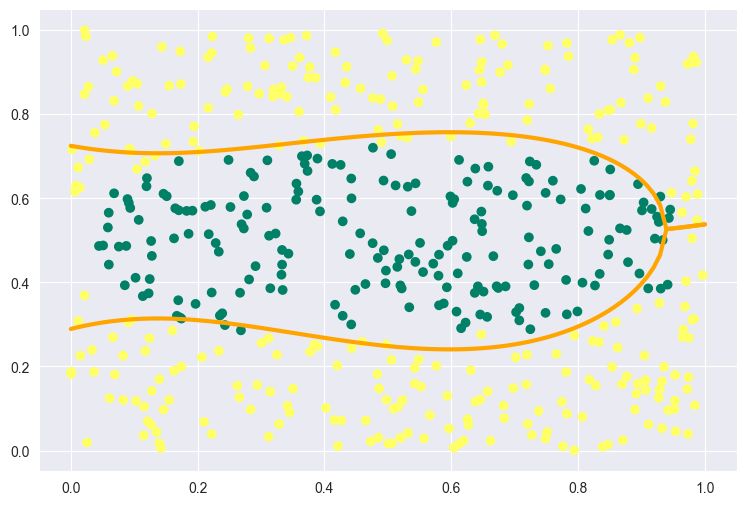

In [450]:
model_23 = lr.LogisticRegression(dim=3)
model_23.fit(X_train, y_train, lr=learning_rate, nb_epochs=epochs, plot=False)

b = model_23.b
W = model_23.weights

x0 = np.linspace(0, 1, 100)

# We use the following package only to solve 
# wT.X = 0 in order to plot the model, it would
# not be useful otherwise

import sympy as sy

x1 = sy.Symbol('x1')

eqs = np.array([sy.Eq( x1 ** 3 + W[][0] / W[5][0] * x1 ** 2 + W[3][0] / W[5][0] * x1 + W[0][0] / W[5][0] * x + W[1][0] / W[5][0] * x ** 2 + W[2][0] / W[5][0] * x ** 3 + b / W[5][0], 0) for x in x0])

x1 = np.array([sy.solve(eq) for eq in eqs]).T
x131, x132, x133 = x1

x131 = np.array([sy.re(x) for x in x131])
x132 = np.array([sy.re(x) for x in x132])
x133 = np.array([sy.re(x) for x in x133])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


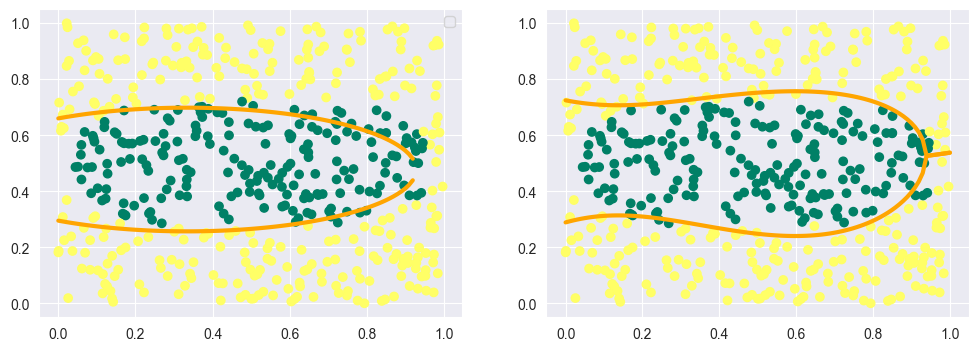

In [459]:
# Plots to compare model on orders 2 and 3
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_train[:,0], X_train[:, 1], c=y_train, cmap='summer')
plt.plot(x0, x121, c='orange', lw=3)
plt.plot(x0, x122, c='orange', lw=3)
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(X_train[:,0], X_train[:, 1], c=y_train, cmap='summer')
plt.plot(x0, x132, c='orange', lw=3)
plt.plot(x0, x133, c='orange', lw=3)
plt.show()

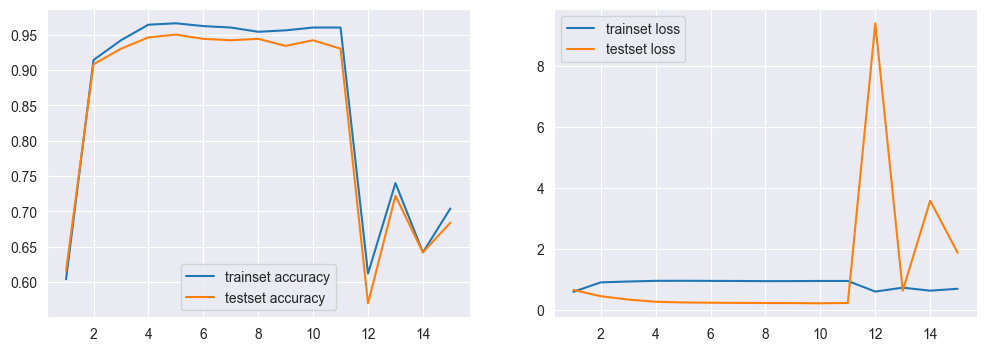

In [461]:
accs_train, accs_test = [], []
losss_train, losss_test = [], []
h_losss_train, h_losss_test = [], []

x_abs = []
for k in range(1 , 16):
    # print('dim: ', k)
    x_abs.append(k)
    model_2 = lr.LogisticRegression(dim=k)
    model_2.fit(X_train, y_train, lr=learning_rate, nb_epochs=epochs, plot=False)

    y_pred_train = model_2.predict(X_train)
    y_pred_test = model_2.predict(X_test)

    accs_train.append(lr.binary_accuracy(y_true=y_train, y_pred=y_pred_train, threshold=0.5))
    accs_test.append(lr.binary_accuracy(y_true=y_test, y_pred=y_pred_test, threshold=0.5))
    losss_train.append(lr.binary_accuracy(y_true=y_train, y_pred=y_pred_train))
    losss_test.append(lr.binary_cross_entropy(y_true=y_test, y_pred=y_pred_test))
    h_losss_train.append(lr.hinge_loss(y_true=y_train, y_pred=y_pred_train))
    h_losss_test.append(lr.hinge_loss(y_true=y_test, y_pred=y_pred_test))

nb_column = 2

h_losss_train = np.array(h_losss_train).reshape(-1)
h_losss_test = np.array(h_losss_test).reshape(-1)


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(x_abs, accs_train, label='trainset accuracy')
plt.plot(x_abs, accs_test, label='testset accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x_abs, losss_train, label='trainset loss')
plt.plot(x_abs, losss_test, label='testset loss')
# plt.subplot(1, 3, 3)
# plt.plot(x_abs, h_losss_train, label='trainset hinge loss')
# plt.plot(x_abs, h_losss_test, label='testset hinge loss')
plt.legend()
plt.show()

## [3] Further Steps (optional)

If you're done with the assignment but want to some more challenges; consider the following:

- Try a different objective function (e.g. [hinge-loss](https://en.wikipedia.org/wiki/Hinge_loss)). How does this affect the classifier?
- Try a more sophisticated stopping criterion than a fixed number of epochs
- Try a different optimization algorithm than simple gradient descent, for instance:
    - The [ADAM](https://optimization.cbe.cornell.edu/index.php?title=Adam) optimizer is a variation of gradient descent that is quite popular in deep learning.
    - The quasi-newton method [BGFS](https://optimization.cbe.cornell.edu/index.php?title=Quasi-Newton_methods#BFGS_method), which typically converge much faster
- Try to generalize your classifier to a [Multilayer Perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) neural network classifier.



### [3.1] Different objective function

In [453]:
print(lr.hinge_loss(y_true=y_train, y_pred=y_pred_train))

[[0.999584]]
